In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000)   #設定最大能顯示1000columns
from sklearn import tree
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder       #轉字串為數字
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix


In [2]:
FirstData = pd.read_csv("Cancer.csv", thousands=",")    # 匯入csv檔，將千分位記號捨去
FirstData = FirstData.replace('?', np.nan)              # 將 ? 號值改成NaN
FirstData.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:cervical condylomatosis,STDs:vaginal condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:pelvic inflammatory disease,STDs:genital herpes,STDs:molluscum contagiosum,STDs:AIDS,STDs:HIV,STDs:Hepatitis B,STDs:HPV,STDs: Number of diagnosis,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Cancer
0,18,4,15,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
2,34,1,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,1,0,1,0,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,0,0,0,0,0,0,0,0,0


In [3]:
FirstData = FirstData._convert(numeric=True)   # 轉換欄位值型態
print(FirstData.dtypes)
FirstData.isnull().sum()         # 計算個欄位空值總數

Age                                     int64
Number of sexual partners             float64
First sexual intercourse              float64
Num of pregnancies                    float64
Smokes                                float64
Smokes (years)                        float64
Smokes (packs/year)                   float64
Hormonal Contraceptives               float64
Hormonal Contraceptives (years)       float64
IUD                                   float64
IUD (years)                           float64
STDs                                  float64
STDs (number)                         float64
STDs:condylomatosis                   float64
STDs:cervical condylomatosis          float64
STDs:vaginal condylomatosis           float64
STDs:vulvo-perineal condylomatosis    float64
STDs:syphilis                         float64
STDs:pelvic inflammatory disease      float64
STDs:genital herpes                   float64
STDs:molluscum contagiosum            float64
STDs:AIDS                         

Age                                     0
Number of sexual partners              26
First sexual intercourse                7
Num of pregnancies                     56
Smokes                                 13
Smokes (years)                         13
Smokes (packs/year)                    13
Hormonal Contraceptives               108
Hormonal Contraceptives (years)       108
IUD                                   117
IUD (years)                           117
STDs                                  105
STDs (number)                         105
STDs:condylomatosis                   105
STDs:cervical condylomatosis          105
STDs:vaginal condylomatosis           105
STDs:vulvo-perineal condylomatosis    105
STDs:syphilis                         105
STDs:pelvic inflammatory disease      105
STDs:genital herpes                   105
STDs:molluscum contagiosum            105
STDs:AIDS                             105
STDs:HIV                              105
STDs:Hepatitis B                  

In [4]:
FirstData = FirstData.drop('STDs: Time since first diagnosis',axis=1)       
FirstData = FirstData.drop('STDs: Time since last diagnosis',axis=1)
FirstData = FirstData.drop('STDs:cervical condylomatosis',axis=1)
FirstData = FirstData.drop('STDs:vaginal condylomatosis',axis=1)                # 根據kaggle的統計資料，刪除過多 NaN 值的項
FirstData = FirstData.drop('STDs:pelvic inflammatory disease',axis=1)
FirstData = FirstData.drop('STDs:genital herpes',axis=1)
FirstData = FirstData.drop('STDs:molluscum contagiosum',axis=1)
FirstData = FirstData.drop('STDs:AIDS',axis=1)
FirstData = FirstData.drop('STDs:Hepatitis B',axis=1)
FirstData = FirstData.drop('STDs:HPV',axis=1)
FirstData = FirstData.drop('STDs: Number of diagnosis',axis=1)

FirstData.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy,Cancer
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,0,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0


In [5]:
def convert_median(name0 = '') : 
    FirstData[name0] = FirstData[name0].fillna(FirstData[name0].median())            # 補缺失值: 平均

convert_median('Number of sexual partners')
convert_median('First sexual intercourse')
convert_median('Num of pregnancies')
convert_median('Smokes (years)')
convert_median('Smokes (packs/year)')
convert_median('Hormonal Contraceptives (years)')
convert_median('STDs (number)')
convert_median('STDs:condylomatosis')
convert_median('STDs:vulvo-perineal condylomatosis')
convert_median('STDs:syphilis')
convert_median('STDs:HIV')

def convert_0_1( name1 = '', num1 = 0 ) : 
    FirstData[name1] = FirstData[name1].fillna(0)           # 補缺失值: 補0 or 1 

convert_0_1('IUD', 0)
convert_0_1('IUD (years)', 0)
convert_0_1('Smokes', 1)
convert_0_1('STDs', 1)
convert_0_1('Hormonal Contraceptives', 1)

FirstData = FirstData.drop('Dx',axis=1)       # 刪除 Dx 欄位

FirstData.tail()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy,Cancer
853,34,3.0,18.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
854,32,2.0,19.0,1.0,0.0,0.0,0.0,1.0,8.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
855,25,2.0,17.0,0.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,1,0,1
856,33,2.0,24.0,2.0,0.0,0.0,0.0,1.0,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0
857,29,2.0,20.0,1.0,0.0,0.0,0.0,1.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='STDs (number)', ylabel='count'>

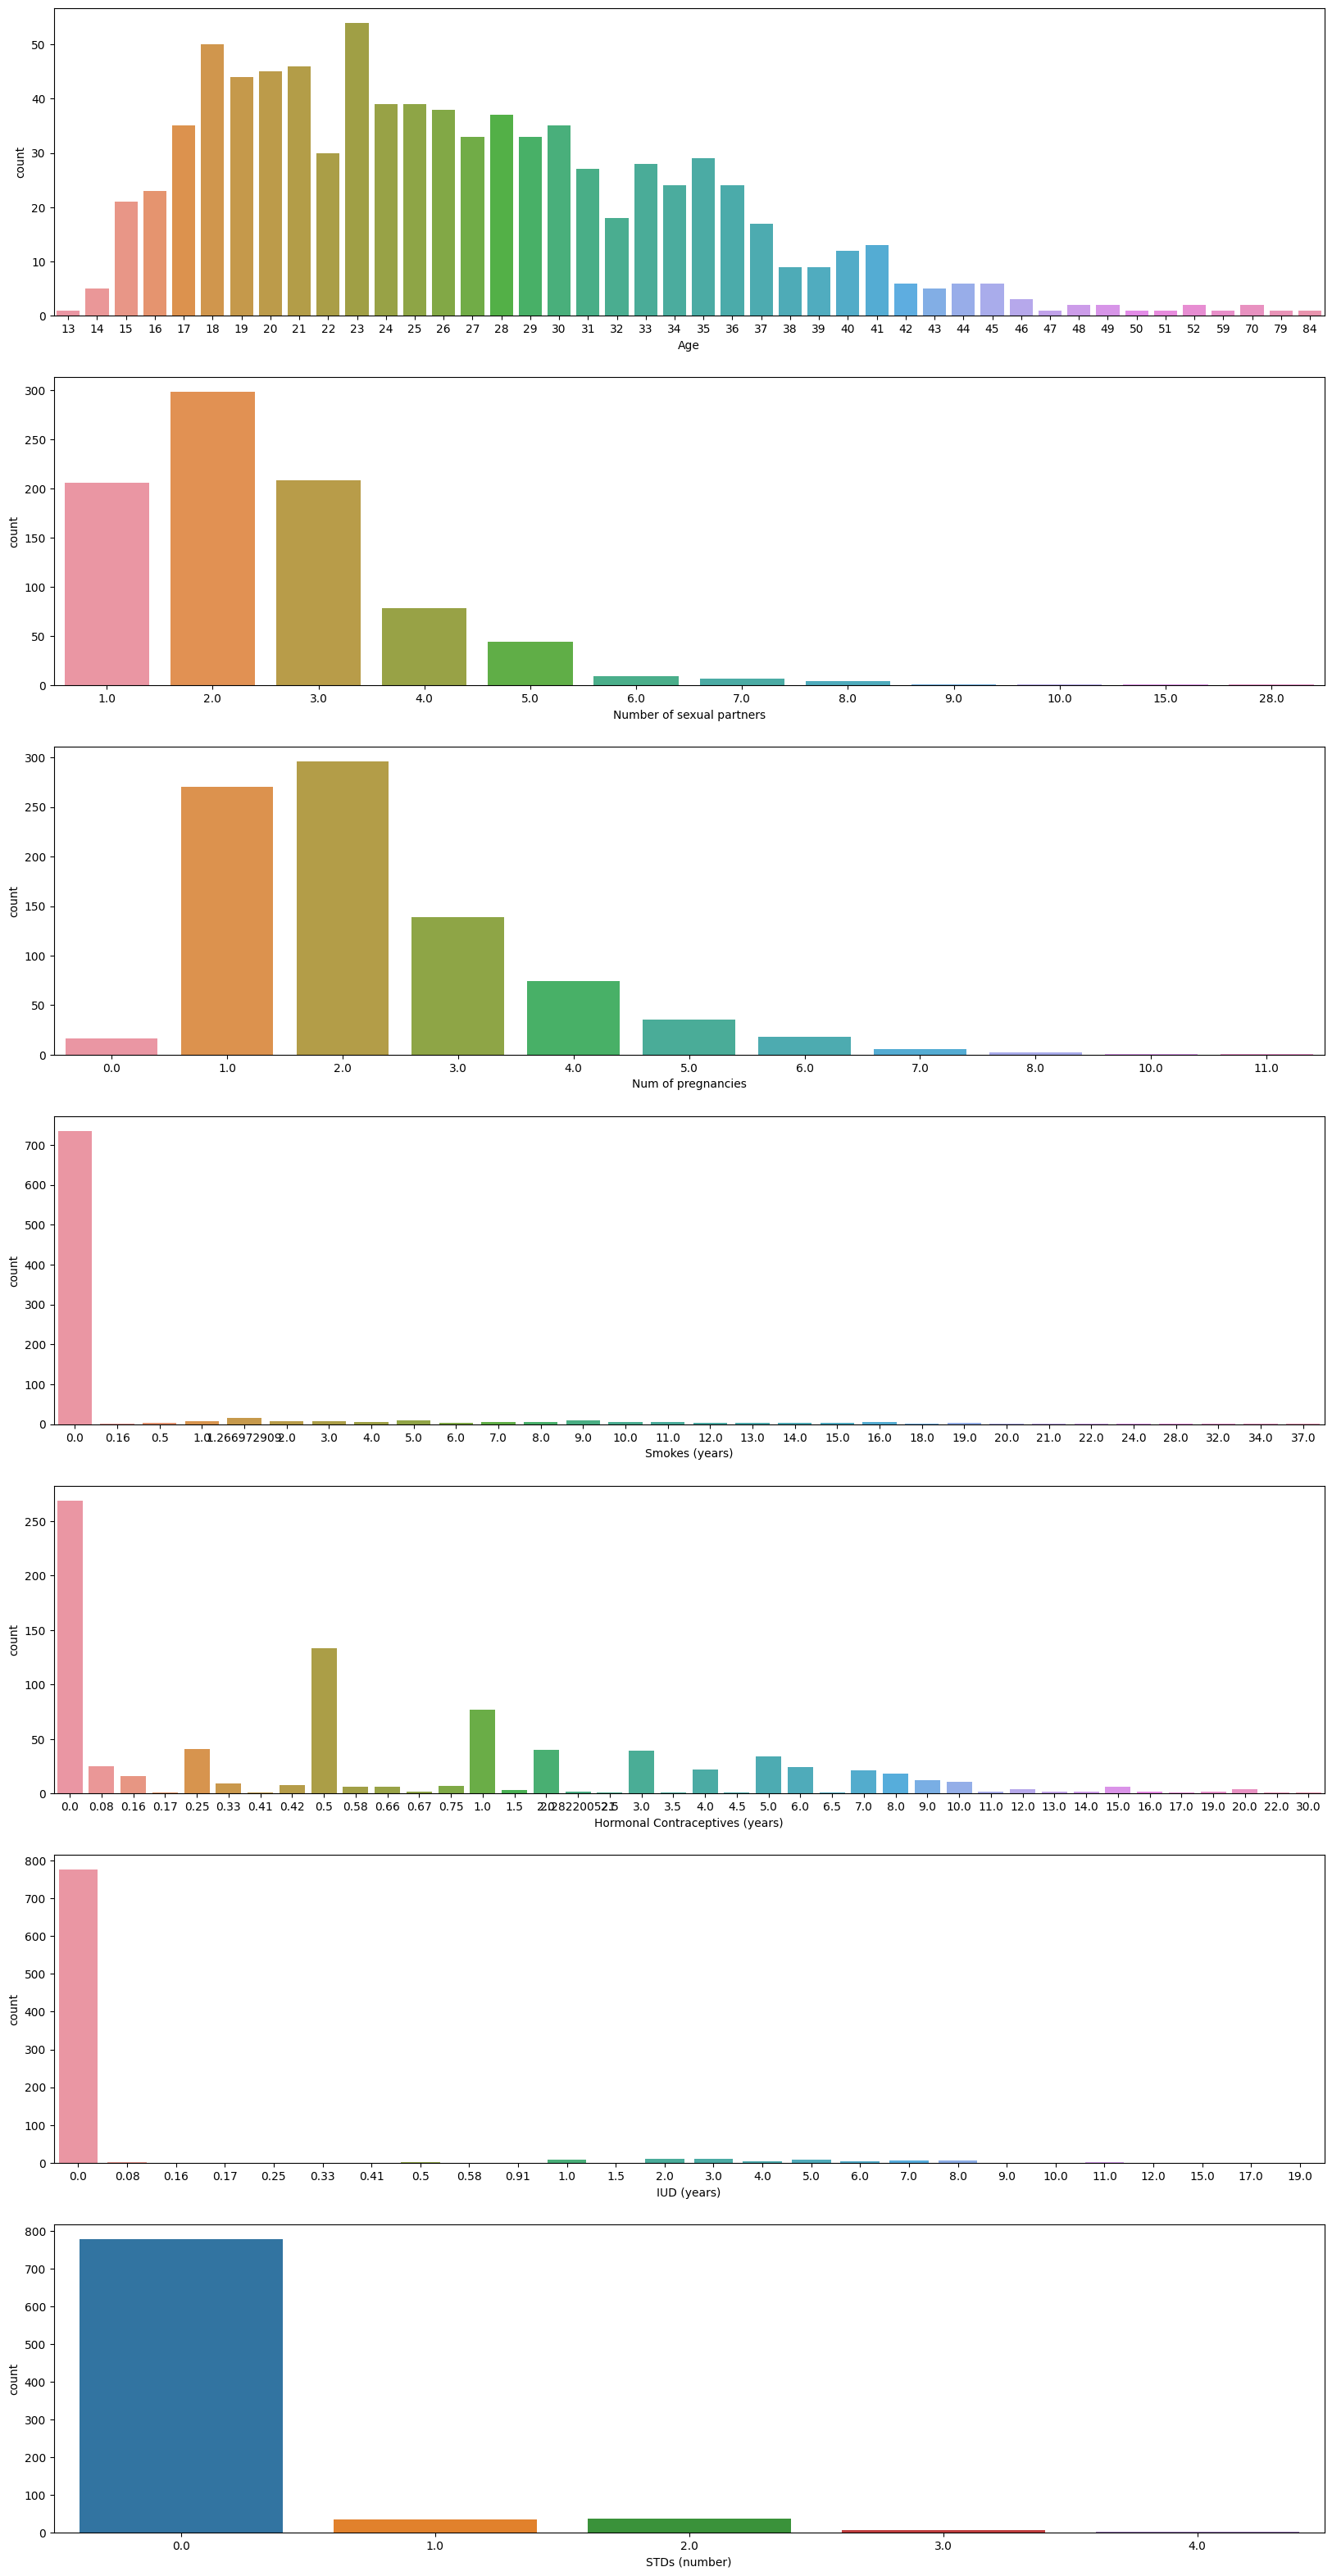

In [6]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=FirstData, ax=ax1)
sns.countplot(x='Number of sexual partners', data=FirstData, ax=ax2)
sns.countplot(x='Num of pregnancies', data=FirstData, ax=ax3)
sns.countplot(x='Smokes (years)', data=FirstData, ax=ax4)                             # 各種連續值欄位統計圖
sns.countplot(x='Hormonal Contraceptives (years)', data=FirstData, ax=ax5)
sns.countplot(x='IUD (years)', data=FirstData, ax=ax6)
sns.countplot(x='STDs (number)', data=FirstData, ax=ax7)

<AxesSubplot: xlabel='Hinselmann', ylabel='count'>

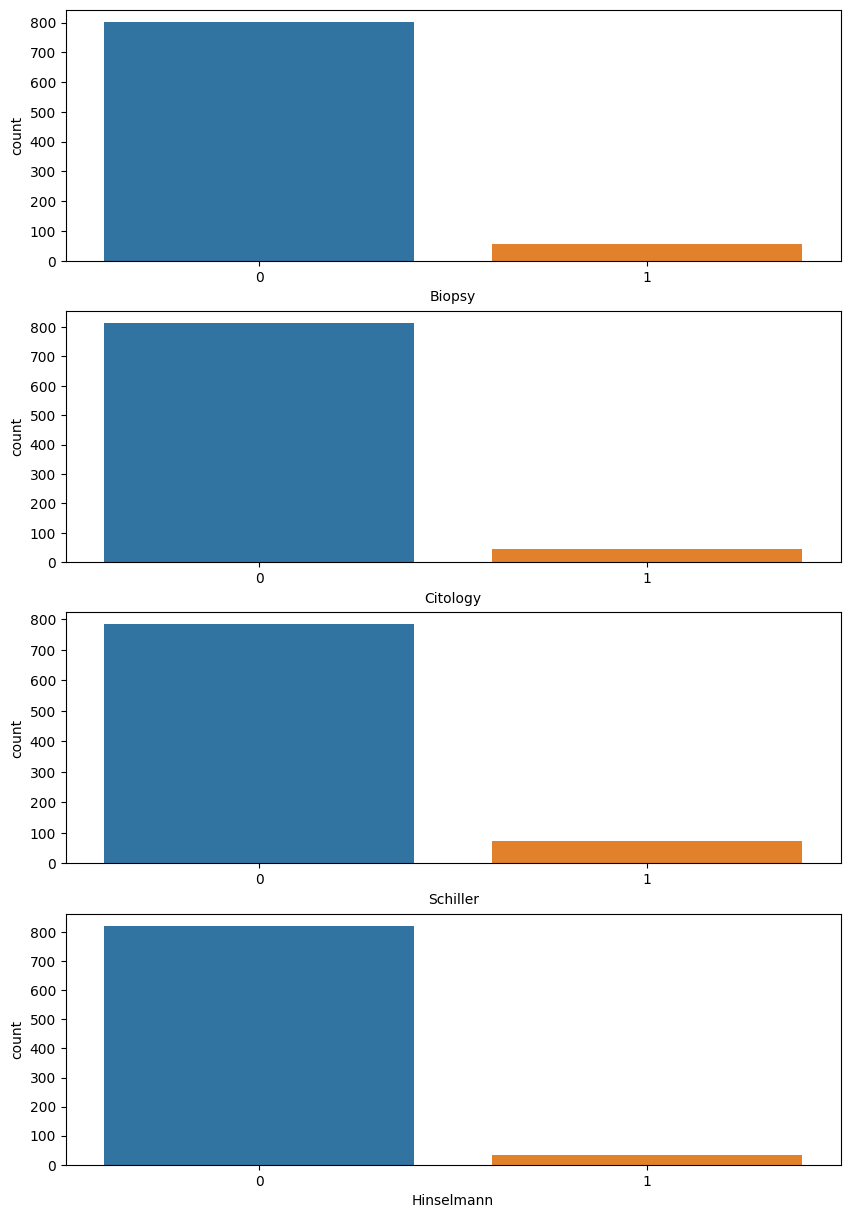

In [7]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1,figsize=(10,15))
sns.countplot(x='Biopsy', data=FirstData, ax=ax1)
sns.countplot(x='Citology', data=FirstData, ax=ax2)
sns.countplot(x='Schiller', data=FirstData, ax=ax3)                           # 檢查結果統計圖
sns.countplot(x='Hinselmann', data=FirstData, ax=ax4)

Dx:Cancer: 18
Biopsy: 55


<BarContainer object of 2 artists>

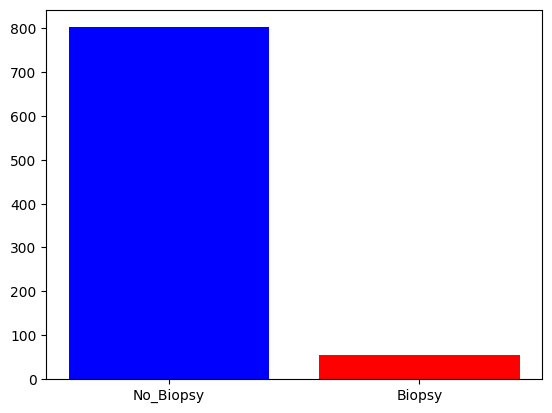

In [8]:
num = 0 
num1 = 0 

for i in range(len(FirstData)) : 
    if FirstData['Dx:Cancer'][i] == 1 :
        num = num + 1 
    
print("Dx:Cancer:", num)                                 ## 曾經得過癌症

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 :
        num1 = num1 + 1 
    
print("Biopsy:", num1)                                 ## 切片陽性數量

x = ['No_Biopsy','Biopsy']                  ## 有沒有癌症數量統計圖
color = ['b','r']
h = [802,55]
plt.bar(x,h,color = color)


In [48]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


train_x = FirstData.drop(columns=['Age','Number of sexual partners','First sexual intercourse','Num of pregnancies','Smokes (years)','Smokes (packs/year)',
                                 'Hormonal Contraceptives (years)','IUD (years)','STDs (number)','Biopsy'])  
train_y = FirstData[["Biopsy"]]  #目標值

X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state = 12)  # 劃分訓練集，測試集

'''X_train = 訓練集特徵 X_test = 測試集特徵
   Y_train = 訓練集目標標籤、 Y_test = 測試集目標標籤'''

# 模型建立
model_nb = GaussianNB()                        ## Naive bayes
model_nb.fit(X_train, Y_train)
# 預測
pred_nb = model_nb.predict(X_test)
# 衡量
print("正確率為", metrics.accuracy_score(Y_test, pred_nb))  
print('recall:',metrics.recall_score(Y_test, pred_nb))
print('precision:',metrics.precision_score(Y_test, pred_nb))
print('f1_score:',metrics.f1_score(Y_test, pred_nb))
print(confusion_matrix(Y_test, pred_nb))  

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


正確率為 0.8558139534883721
recall: 0.8461538461538461
precision: 0.275
f1_score: 0.41509433962264153
[[173  29]
 [  2  11]]
(643, 15)
(215, 15)
(643, 1)
(215, 1)


,Biopsy
78,0
29,0
443,0
75,0
662,0


In [12]:
train_x = FirstData.drop(columns=['Smokes (years)','Smokes (packs/year)',
                                 'Hormonal Contraceptives (years)','IUD (years)','STDs (number)','Dx:CIN','STDs:syphilis','Biopsy', 'Cancer'])  
train_y = FirstData[["Biopsy"]]  #目標值

X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size = 0.25, random_state = 20)  # 劃分訓練集，測試集


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


model = KNeighborsClassifier(n_neighbors=5)                                            # KNN Model 
model.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("使用KNN正確率為:", metrics.accuracy_score(yyyyy, Y_test))

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neighbors\_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


使用KNN正確率為: 0.9534883720930233
正確率為 0.9534883720930233
recall: 0.0
precision: 0.0
f1_score: 0.0
[[205   0]
 [ 10   0]]


c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn.tree import plot_tree

model0 = DecisionTreeClassifier(criterion="entropy", max_leaf_nodes = 20 )   # Entropy node Decision tree
model0.fit(X_train, Y_train)
yyyyy = model0.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))


正確率為 0.9302325581395349
recall: 0.8
precision: 0.38095238095238093
f1_score: 0.5161290322580645
[[192  13]
 [  2   8]]


In [78]:
model = DecisionTreeClassifier(criterion="entropy", max_depth= 6)   # Entropy depth Decision tree
model.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

正確率為 0.9255813953488372
recall: 0.6
precision: 0.3333333333333333
f1_score: 0.42857142857142855
[[193  12]
 [  4   6]]


In [79]:
model1 = DecisionTreeClassifier(criterion="gini", max_leaf_nodes= 10)   # gini node Decision tree
model1.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

正確率為 0.9255813953488372
recall: 0.6
precision: 0.3333333333333333
f1_score: 0.42857142857142855
[[193  12]
 [  4   6]]


In [ ]:
from sklearn.tree import plot_tree
FirstData['Cancer'] = FirstData['Cancer'].astype(str)

fig, ax = plt.subplots(figsize = (15,15))
plot_tree(model0, class_names='Cancer')

In [80]:
model = DecisionTreeClassifier(criterion="gini", max_depth= 8)   # gini depth Decision tree, depth = 8 模型最好
model.fit(X_train, Y_train)
yyyyy = model.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

正確率為 0.9534883720930233
recall: 0.7
precision: 0.5
f1_score: 0.5833333333333334
[[198   7]
 [  3   7]]


In [17]:
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

model1 = RandomForestClassifier(criterion="entropy", max_leaf_nodes= 16)   
model1.fit(X_train, Y_train)
yyyyy = model1.predict(X_test)

print("正確率為", metrics.accuracy_score(Y_test, yyyyy))  
print('recall:',metrics.recall_score(Y_test, yyyyy))
print('precision:',metrics.precision_score(Y_test,yyyyy))
print('f1_score:',metrics.f1_score(Y_test, yyyyy))
print(confusion_matrix(Y_test, yyyyy))

正確率為 0.9534883720930233
recall: 0.9
precision: 0.5
f1_score: 0.6428571428571429
[[196   9]
 [  1   9]]


C:\Users\user\AppData\Local\Temp\ipykernel_8596\2410031885.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model1.fit(X_train, Y_train)


In [ ]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize = (15,15))
plot_tree(model0, class_names=FirstData['Biopsy'])

In [86]:
import eli5
from eli5.sklearn import PermutationImportance

random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_train, Y_train)   ##  分析與計算欄位權重值，找出影響力大的欄位

permumtation_impor = PermutationImportance(random_forest, random_state=2019).fit(X_test, Y_test)
eli5.show_weights(permumtation_impor, feature_names = X_test.columns.tolist())

C:\Users\user\AppData\Local\Temp\ipykernel_14240\2572413434.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest = RandomForestClassifier(n_estimators=500, random_state=2019).fit(X_train, Y_train)   ##  分析與計算欄位權重值，找出影響力大的欄位


Weight,Feature
0.0437 ± 0.0397,Schiller
0.0084 ± 0.0070,Number of sexual partners
0.0084 ± 0.0070,Age
0.0047 ± 0.0000,Citology
0.0047 ± 0.0000,Num of pregnancies
0.0028 ± 0.0046,Hinselmann
0.0028 ± 0.0046,First sexual intercourse
0 ± 0.0000,Dx:HPV
0 ± 0.0000,Dx:Cancer
0 ± 0.0000,STDs:HIV


In [21]:
Data_0 = FirstData[FirstData.Biopsy == 1]                       # Cancer欄位為1的Dataframe
Data_0.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),STDs:condylomatosis,STDs:vulvo-perineal condylomatosis,STDs:syphilis,STDs:HIV,Dx:Cancer,Dx:CIN,Dx:HPV,Hinselmann,Schiller,Citology,Biopsy,Cancer
6,51,3.0,17.0,6.0,1.0,34.0,3.4,0.0,0.00,1.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1,0,1,3
22,40,1.0,18.0,1.0,0.0,0.0,0.0,1.0,0.25,0.0,0.0,1.0,2.0,1.0,1.0,0.0,0.0,0,0,0,0,1,1,1,3
23,40,1.0,20.0,2.0,0.0,0.0,0.0,1.0,15.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,1,1,1,0,1,3
41,37,2.0,18.0,2.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0,1,0,0,1,0,1,2
44,37,3.0,19.0,3.0,1.0,12.0,6.0,1.0,13.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1,0,1,2


In [45]:
num = 0 
num1 = 0 
num2 = 0 
num3 = 0 
num4 = 0 
num5 = 0 
num6 = 0 
num7 = 0 
num8 = 0 
num9 = 0 
num10 = 0 

for i in range(len(FirstData)) : 
    if FirstData['Smokes'][i] == 1 :
        num = num + 1 
    
print("Smokes:", num)                                 

for i in range(len(FirstData)) : 
    if FirstData['Hormonal Contraceptives'][i] == 1 :        
        num1 = num1 + 1 
    
print("Hormonal Contraceptives:", num1)                 

for i in range(len(FirstData)) : 
    if FirstData['IUD'][i] == 1 :        
        num2 = num2 + 1 
    
print("IUD:", num2)   

for i in range(len(FirstData)) : 
    if FirstData['STDs'][i] == 1 :        
        num3 = num3 + 1 
    
print("STDs:", num3)   

for i in range(len(FirstData)) : 
    if FirstData['STDs:HIV'][i] == 1 :        
        num4 = num4 + 1 
    
print("STDs:HIV:", num4)   

for i in range(len(FirstData)) : 
    if FirstData['Dx:Cancer'][i] == 1 :        
        num5 = num5 + 1 
    
print("Dx:Cancer", num5)   

for i in range(len(FirstData)) : 
    if FirstData['Dx:CIN'][i] == 1 :        
        num6 = num6 + 1 
    
print("Dx:CIN", num6)   

for i in range(len(FirstData)) : 
    if FirstData['Dx:HPV'][i] == 1 :        
        num7 = num7 + 1 
    
print("Dx:HPV", num7) 

for i in range(len(FirstData)) : 
    if FirstData['Hinselmann'][i] == 1 :        
        num8 = num8 + 1 
    
print("Hinselmann", num8) 

for i in range(len(FirstData)) : 
    if FirstData['Schiller'][i] == 1 :        
        num9 = num9 + 1 
    
print("Schiller", num9) 

for i in range(len(FirstData)) : 
    if FirstData['Citology'][i] == 1 :        
        num10 = num10 + 1 
    
print("Citology", num10) 



Smokes: 123
Hormonal Contraceptives: 481
IUD: 83
STDs: 79
STDs:HIV: 18
Dx:Cancer 18
Dx:CIN 9
Dx:HPV 18
Hinselmann 35
Schiller 74
Citology 44


<BarContainer object of 11 artists>

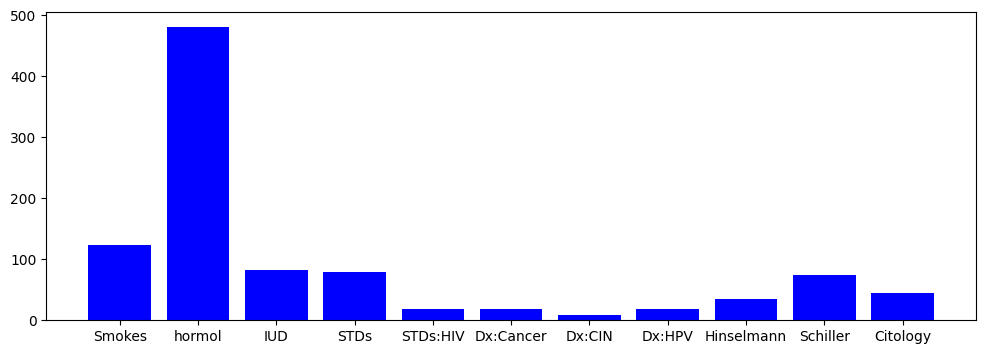

In [46]:
x = ['Smokes','hormol','IUD','STDs','STDs:HIV','Dx:Cancer','Dx:CIN','Dx:HPV','Hinselmann','Schiller','Citology']      # 各種離散( 0,1 )型陽性統計圖 
color = ['b','b','b','b','b','b','b','b','b','b','b']
h = [123,481,83,79,18,18,9,18,35,74,44]
plt.figure(figsize=(12,4))
plt.bar(x,h,color = color)

In [39]:
num = 0 
num1 = 0 
num2 = 0 
num3 = 0 
num4 = 0 
num5 = 0 
num6 = 0 
num7 = 0 
num8 = 0 
num9 = 0 
num10 = 0 

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Smokes'][i] == 1 :
        num = num + 1 
    
print("Smokes:", num)                                 

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Hormonal Contraceptives'][i] == 1 :        
        num1 = num1 + 1 
    
print("Hormonal Contraceptives:", num1)                 

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['IUD'][i] == 1 :        
        num2 = num2 + 1 
    
print("IUD:", num2)   

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['STDs'][i] == 1 :        
        num3 = num3 + 1 
    
print("STDs:", num3)   

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['STDs:HIV'][i] == 1 :        
        num4 = num4 + 1 
    
print("STDs:HIV:", num4)   

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Dx:Cancer'][i] == 1 :        
        num5 = num5 + 1 
    
print("Dx:Cancer", num5)   

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Dx:CIN'][i] == 1 :        
        num6 = num6 + 1 
    
print("Dx:CIN", num6)   

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Dx:HPV'][i] == 1 :        
        num7 = num7 + 1 
    
print("Dx:HPV", num7) 

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Hinselmann'][i] == 1 :        
        num8 = num8 + 1 
    
print("Hinselmann", num8) 

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Schiller'][i] == 1 :        
        num9 = num9 + 1 
    
print("Schiller", num9) 

for i in range(len(FirstData)) : 
    if FirstData['Biopsy'][i] == 1 and FirstData['Citology'][i] == 1 :        
        num10 = num10 + 1 
    
print("Citology", num10) 

Smokes: 10
Hormonal Contraceptives: 36
IUD: 9
STDs: 12
STDs:HIV: 5
Dx:Cancer 6
Dx:CIN 3
Dx:HPV 6
Hinselmann 25
Schiller 48
Citology 18


<BarContainer object of 11 artists>

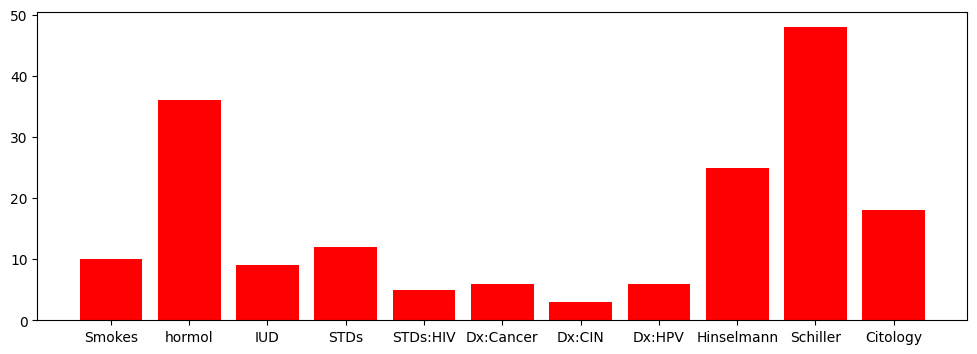

In [44]:
x = ['Smokes','hormol','IUD','STDs','STDs:HIV','Dx:Cancer','Dx:CIN','Dx:HPV','Hinselmann','Schiller','Citology']      # 各種離散( 0,1 )型陽性統計圖 
color = ['r','r','r','r','r','r','r','r','r','r','r']
h = [10,36,9,12,5,6,3,6,25,48,18]
plt.figure(figsize=(12,4))
plt.bar(x,h,color = color)

In [19]:

def TheWhole(name='', num = 0.0) : 
  for i in range(len(Data_0)) : 
    if Data_0[name][i] == 1 : 
       num = num + 1.0
    i = i + 1 

  print(name,': ',num)                                            ## 計算統計罹患癌症的人各項檢查陽性數量，找出影響力最大的特徵

TheWhole("Cancer")                         
TheWhole("Smokes",numOfsmoke)                         
TheWhole('Hormonal Contraceptives',numOfhormol)
TheWhole('IUD',numOfIUD)
TheWhole('STDs:condylomatosis',numOfcon)
TheWhole('STDs:vulvo-perineal condylomatosis',numOfvpc)
TheWhole('STDs:syphilis',numOfsyp)
TheWhole('STDs:HIV',numOfhiv)
TheWhole('Dx:CIN',dx0)
TheWhole('Dx:HPV',dx1)
TheWhole('STDs',dxstd)

x = ['Smokes','hormol','IUD','con','vpc','syp','hiv','Dx:cin','Dx:HPV','STDs']      # 各種離散( 0,1 )型陽性統計圖 
color = ['r','r','r','r','r','r','r','r','r','r']
h = [12,48,14,8,8,1,6,1,16,14]
plt.bar(x,h,color = color)

KeyError: 0

<AxesSubplot: xlabel='STDs (number)', ylabel='count'>

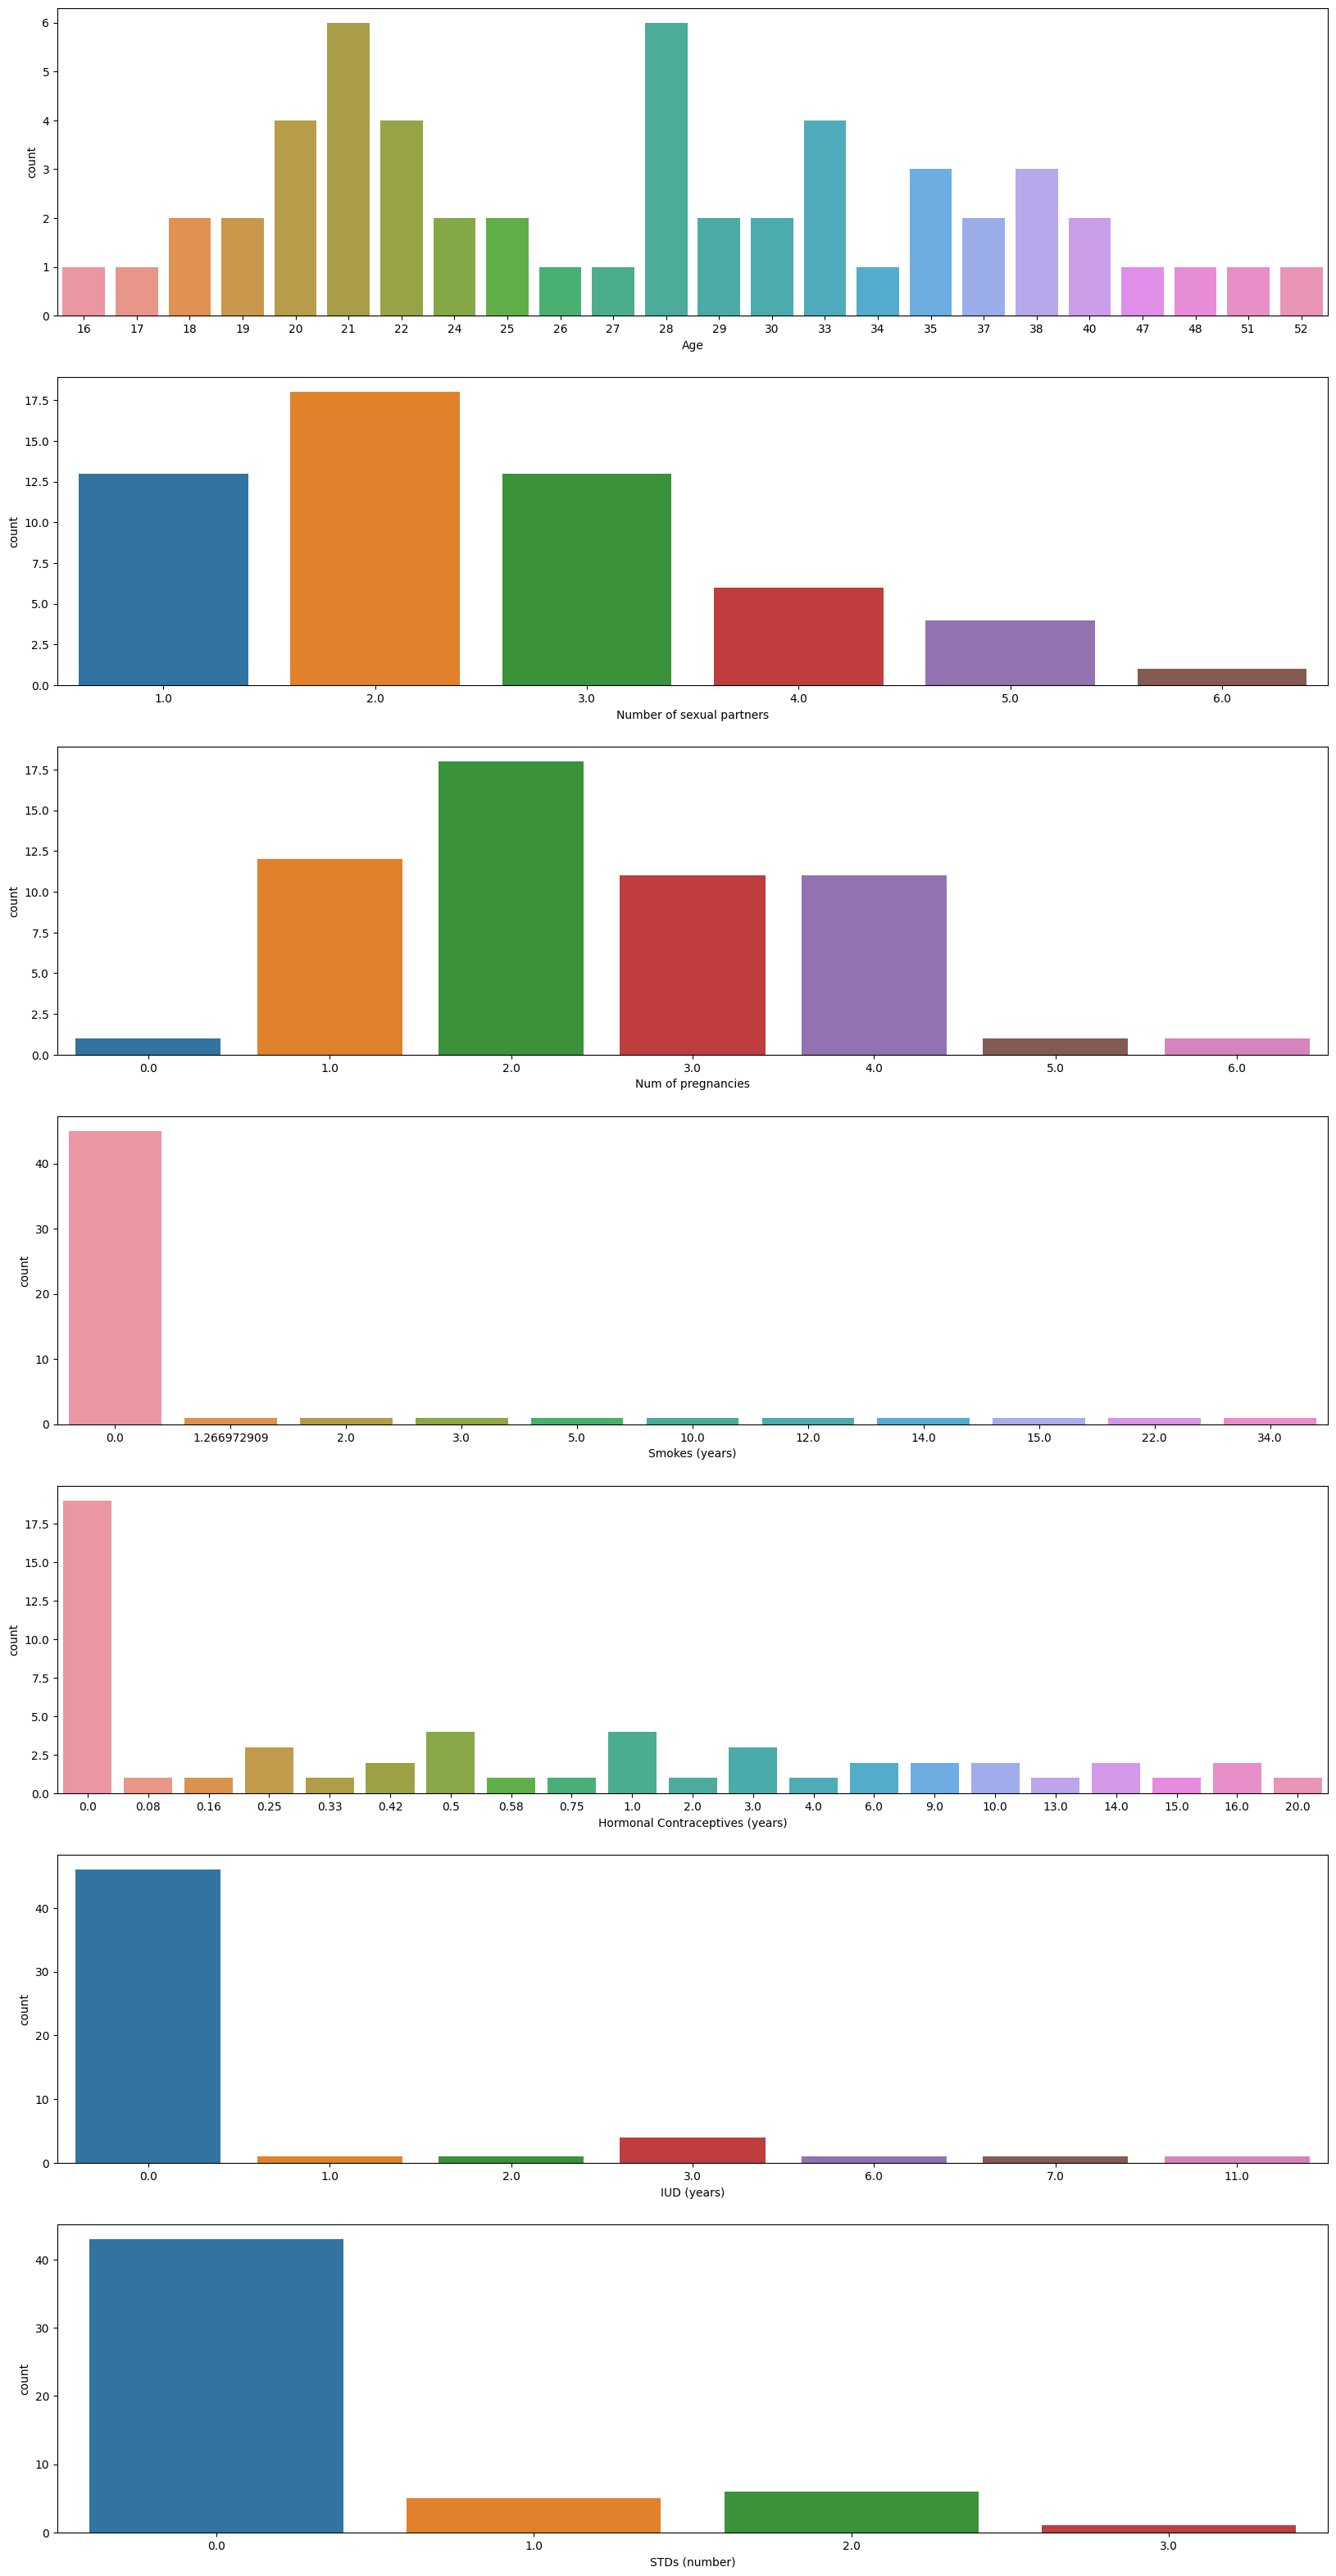

In [47]:
fig, (ax1,ax2,ax3,ax4,ax5,ax6,ax7) = plt.subplots(7,1,figsize=(20,40))
sns.countplot(x='Age', data=Data_0, ax=ax1)
sns.countplot(x='Number of sexual partners', data=Data_0, ax=ax2)
sns.countplot(x='Num of pregnancies', data=Data_0, ax=ax3)                        ## 罹患癌症的人連續特徵值的統計圖
sns.countplot(x='Smokes (years)', data=Data_0, ax=ax4)
sns.countplot(x='Hormonal Contraceptives (years)', data=Data_0, ax=ax5)
sns.countplot(x='IUD (years)', data=Data_0, ax=ax6)
sns.countplot(x='STDs (number)', data=Data_0, ax=ax7)